# **Importing Libraries**

In [52]:
import pandas as pd 
import numpy as np
import datetime as time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import SimpleRNN, Dense
from keras.layers import GRU, Dense

In [3]:
#reading the data from .read_csv function
df = pd.read_csv('train.csv')

In [4]:
#Display top 5 rows of the dataset
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [5]:
#Display the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [6]:
# Convert the datetime oject to to_datetime 
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
# Feature extraction from the datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

In [8]:
# Drop the datetime column
df.drop('datetime',axis=1,inplace=True)

In [9]:
df.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,day_of_week,hour
0,0,-11.4,-17.1,1003.0,571.910,A,216.0,2013,7,1,0,0
1,1,-12.1,-19.3,996.0,575.040,A,210.0,2013,7,1,0,1
2,2,-12.9,-20.0,1000.0,578.435,A,225.0,2013,7,1,0,2
3,3,-11.4,-17.1,995.0,582.580,A,216.0,2013,7,1,0,3
4,4,-11.4,-19.3,1005.0,586.600,A,222.0,2013,7,1,0,4


In [10]:
# Check the count of categories in var2 column
df['var2'].value_counts()

var2
A    25239
C     1040
B      217
Name: count, dtype: int64

In [11]:
# Replace the categories to numerical value
df['var2'] = df['var2'].replace({'A':1,'B':2,'C':3})

In [12]:
# Count negative and positive values
negative_count = np.sum(df['temperature'] < 0)
positive_count = np.sum(df['temperature'] >= 0)

# Calculate percentages
total_count = len(df)
percentage_negative = (negative_count / total_count) * 100
percentage_positive = (positive_count / total_count) * 100

# Display the results
print(f"Percentage of negative values: {percentage_negative:.2f}%")
print(f"Percentage of positive values: {percentage_positive:.2f}%")

Percentage of negative values: 31.69%
Percentage of positive values: 68.31%


In [13]:
# Count negative and positive values
negative_count = np.sum(df['var1'] < 0)
positive_count = np.sum(df['var1'] >= 0)

# Calculate percentages
total_count = len(df)
percentage_negative = (negative_count / total_count) * 100
percentage_positive = (positive_count / total_count) * 100

# Display the results
print(f"Percentage of negative values: {percentage_negative:.2f}%")
print(f"Percentage of positive values: {percentage_positive:.2f}%")

Percentage of negative values: 52.72%
Percentage of positive values: 47.28%


In [14]:
# Check for missing value
missing_value = df.isnull().sum()
print('Missing value:',missing_value)

Missing value: ID                         0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
year                       0
month                      0
day                        0
day_of_week                0
hour                       0
dtype: int64


In [15]:
# Check for duplicate records
duplicate_records = df[df.duplicated()]
print('Number of duplicate values:',duplicate_records)

Number of duplicate values: Empty DataFrame
Columns: [ID, temperature, var1, pressure, windspeed, var2, electricity_consumption, year, month, day, day_of_week, hour]
Index: []


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   temperature              26496 non-null  float64
 2   var1                     26496 non-null  float64
 3   pressure                 26496 non-null  float64
 4   windspeed                26496 non-null  float64
 5   var2                     26496 non-null  int64  
 6   electricity_consumption  26496 non-null  float64
 7   year                     26496 non-null  int32  
 8   month                    26496 non-null  int32  
 9   day                      26496 non-null  int32  
 10  day_of_week              26496 non-null  int32  
 11  hour                     26496 non-null  int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 1.9 MB


# **Descriptive statistics**

In [17]:
df.describe()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,day_of_week,hour
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,1.086692,298.359601,2015.000000,6.500000,12.000000,2.992754,11.500000
std,10122.873673,8.682860,10.424860,12.002647,48.280321,0.397096,108.020555,1.224768,3.452118,6.633375,2.001835,6.922317
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,1.000000,174.000000,2013.000000,1.000000,1.000000,0.000000,0.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,1.000000,219.000000,2014.000000,3.750000,6.000000,1.000000,5.750000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,1.000000,267.000000,2015.000000,6.500000,12.000000,3.000000,11.500000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,1.000000,342.000000,2016.000000,9.250000,18.000000,5.000000,17.250000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,3.000000,1386.000000,2017.000000,12.000000,23.000000,6.000000,23.000000


In [18]:
# Apply describe() to each feature individually
year_stats = df['year'].describe()
month_stats = df['month'].describe()
day_stats = df['day'].describe()
day_of_week_stats = df['day_of_week'].describe()
hour_stats = df['hour'].describe()

In [19]:
# Print the descriptive statistics for each feature
print("Year Statistics:\n", year_stats)
print("\nMonth Statistics:\n", month_stats)
print("\nDay Statistics:\n", day_stats)
print("\nDay of Week Statistics:\n", day_of_week_stats)
print("\Hour Statistics:\n", hour_stats)

Year Statistics:
 count    26496.000000
mean      2015.000000
std          1.224768
min       2013.000000
25%       2014.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: year, dtype: float64

Month Statistics:
 count    26496.000000
mean         6.500000
std          3.452118
min          1.000000
25%          3.750000
50%          6.500000
75%          9.250000
max         12.000000
Name: month, dtype: float64

Day Statistics:
 count    26496.000000
mean        12.000000
std          6.633375
min          1.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: day, dtype: float64

Day of Week Statistics:
 count    26496.000000
mean         2.992754
std          2.001835
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: day_of_week, dtype: float64
\Hour Statistics:
 count    26496.000000
mean        11.500000
std          6.922317
min          0

# **Data Visualization**

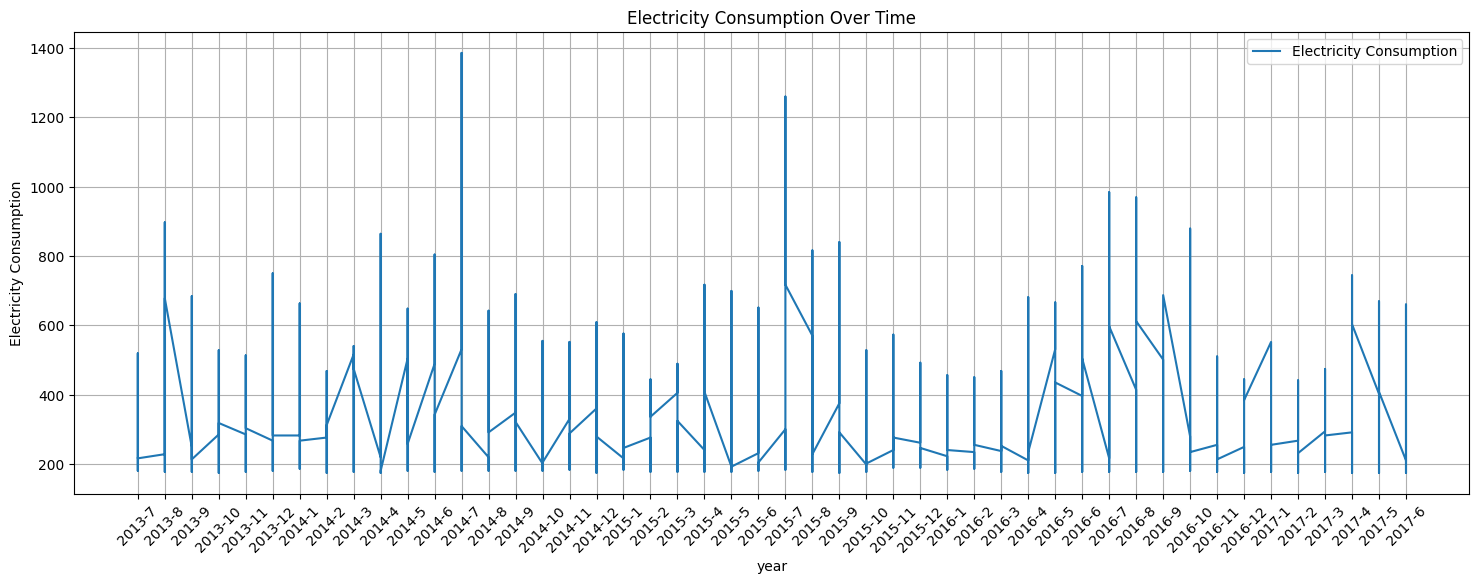

In [20]:
# Time Series Plot for Electricity Consumption
plt.figure(figsize=(18, 6))
plt.plot(df['year'].astype(str) +  '-' + df['month'].astype(str), df['electricity_consumption'], label='Electricity Consumption')
plt.xlabel('year')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

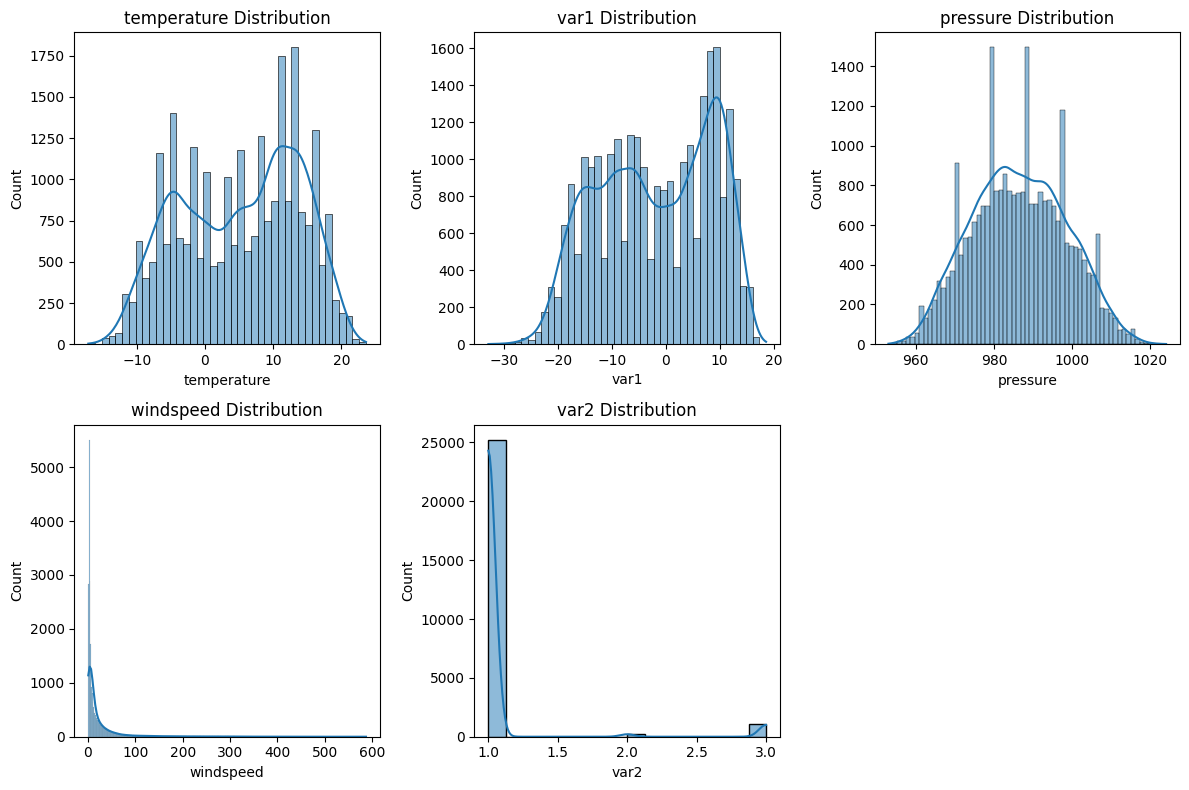

In [21]:
# Histograms and Density Plots for Numerical Features
num_features = ['temperature', 'var1', 'pressure', 'windspeed', 'var2']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

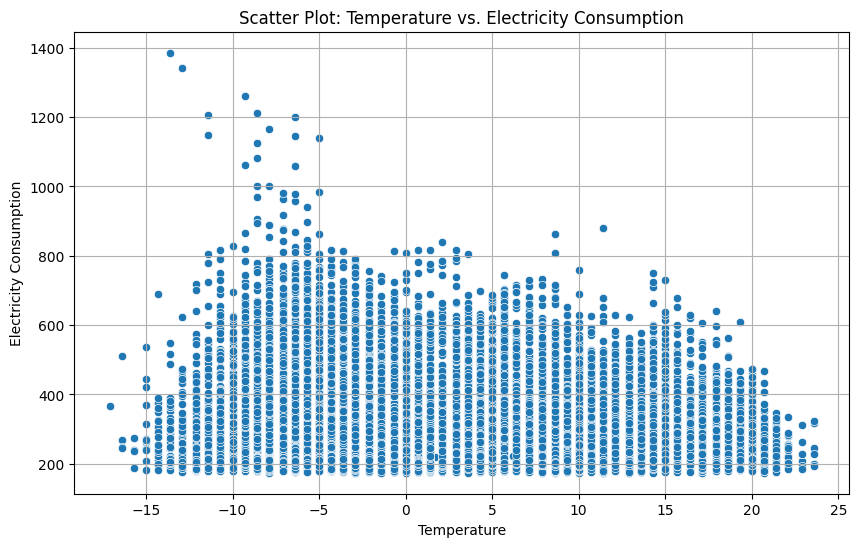

In [22]:
# Scatter Plot between Numerical Feature temperature and Electricity Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='electricity_consumption', data=df)
plt.xlabel('Temperature')
plt.ylabel('Electricity Consumption')
plt.title('Scatter Plot: Temperature vs. Electricity Consumption')
plt.grid(True)
plt.show()

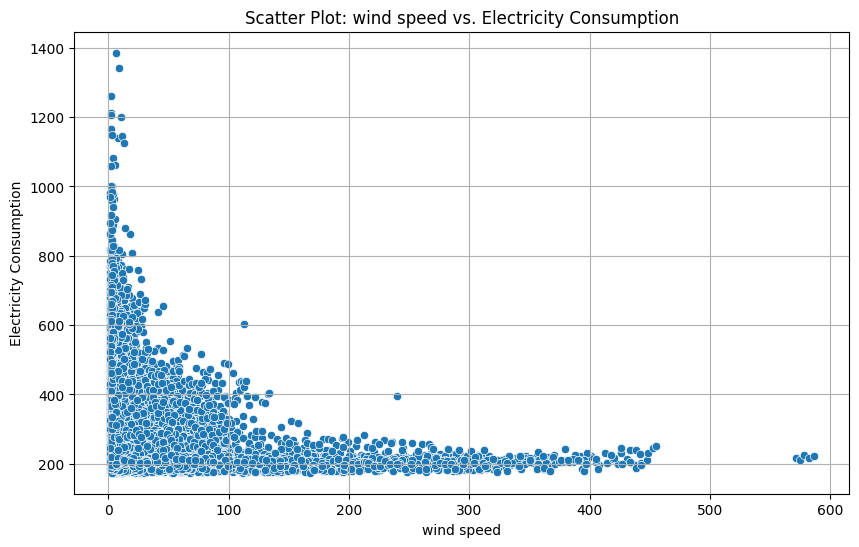

In [23]:
# Scatter Plot between Numerical Feature temperature and Electricity Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='electricity_consumption', data=df)
plt.xlabel('wind speed')
plt.ylabel('Electricity Consumption')
plt.title('Scatter Plot: wind speed vs. Electricity Consumption')
plt.grid(True)
plt.show()

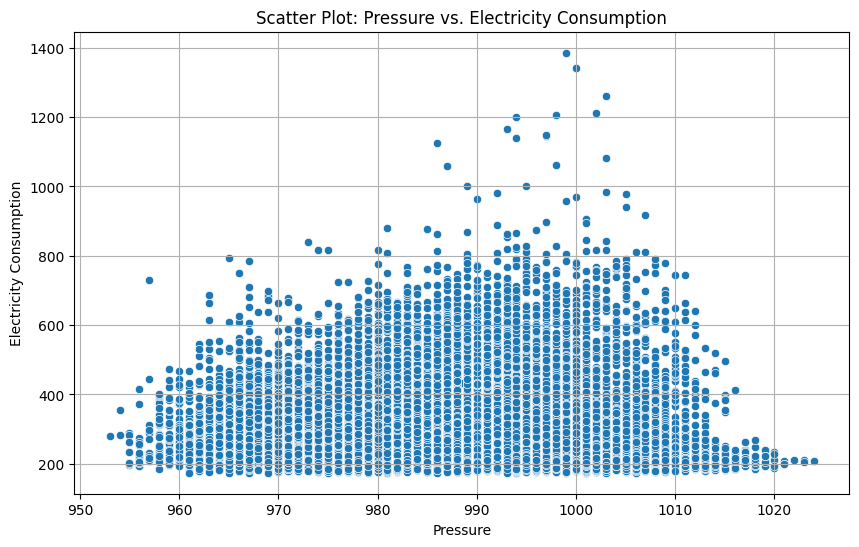

In [24]:
# Scatter Plot between Numerical Feature temperature and Electricity Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pressure', y='electricity_consumption', data=df)
plt.xlabel('Pressure')
plt.ylabel('Electricity Consumption')
plt.title('Scatter Plot: Pressure vs. Electricity Consumption')
plt.grid(True)
plt.show()

# *Univariate Analysis*

        temperature      pressure     windspeed  electricity_consumption
count  26496.000000  26496.000000  26496.000000             26496.000000
mean       2.219899      6.895053      2.369551                 5.649362
std        0.868286      0.012153      1.159203                 0.309572
min        0.000000      6.860664      0.729961                 5.164786
25%        1.420000      6.886532      1.424312                 5.393628
50%        2.350000      6.894670      2.020885                 5.590987
75%        2.920000      6.903747      3.146735                 5.837730
max        4.070000      6.932448      6.376046                 7.234898


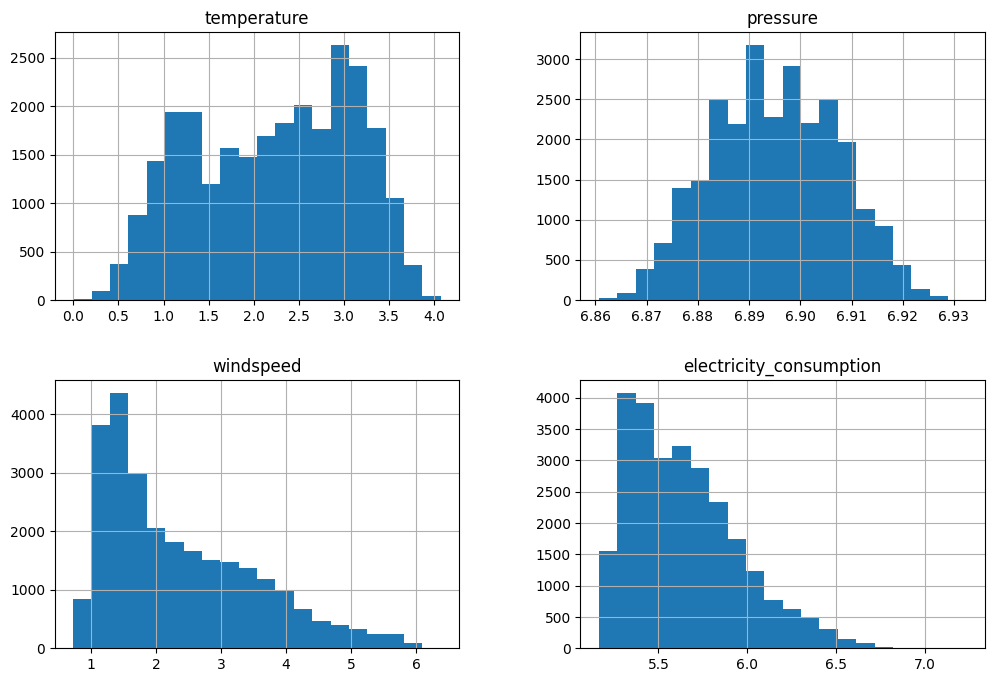

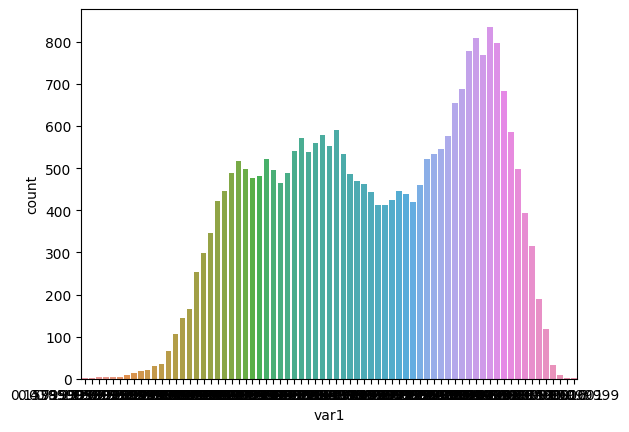

In [41]:
# Basic statistics for temperature, pressure, windspeed, and electricity_consumption
print(df[['temperature', 'pressure', 'windspeed', 'electricity_consumption']].describe())

# Histograms for continuous variables
df[['temperature', 'pressure', 'windspeed', 'electricity_consumption']].hist(bins=20, figsize=(12, 8))
plt.show()

# Bar plots for categorical variables (Var1, Var2)
sns.countplot(data=df, x='var1')
plt.show()
#sns.countplot(data=df, x='var2')
#plt.show()

# *Bivariate Analysis*

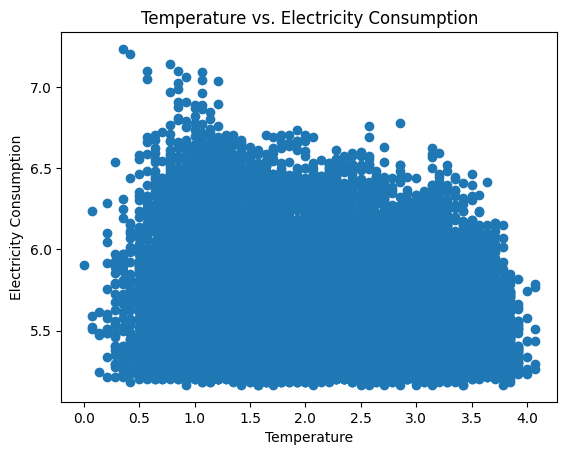

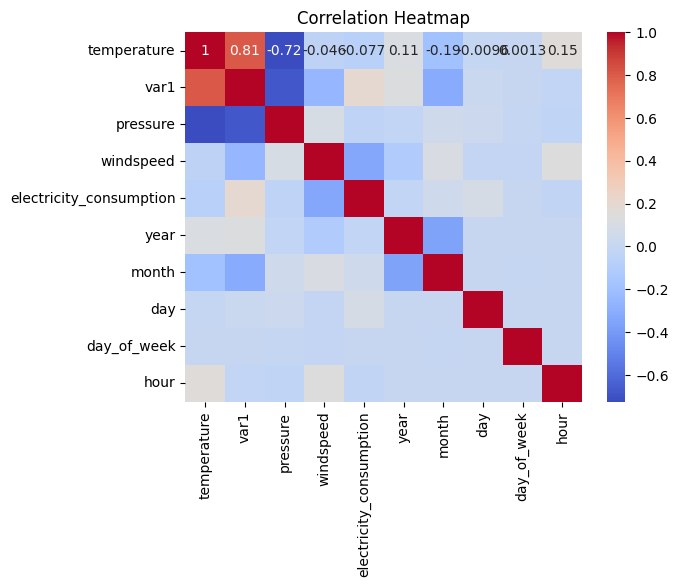

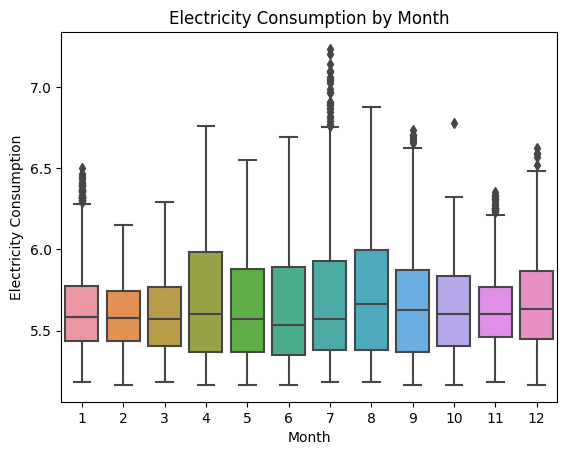

In [42]:
# Scatter plot for Temperature vs. Electricity Consumption
plt.scatter(df['temperature'], df['electricity_consumption'])
plt.xlabel('Temperature')
plt.ylabel('Electricity Consumption')
plt.title('Temperature vs. Electricity Consumption')
plt.show()

# Correlation matrix heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box plot for Electricity Consumption across different months
sns.boxplot(data=df, x='month', y='electricity_consumption')
plt.xlabel('Month')
plt.ylabel('Electricity Consumption')
plt.title('Electricity Consumption by Month')
plt.show()

# *Linear Regression*

In [25]:
# Drop ID and var2 column
df.drop('ID',axis=1,inplace=True)
df.drop('var2',axis=1,inplace=True)

Data is not linear, apply the transformation on the dataset to make it linear

In [26]:
# Step 1: Shift and scale both 'temperature' and 'var1' columns
min_temp = df['temperature'].min()
min_var1 = df['var1'].min()

scale_factor_temp = 10  # Scale factor for 'temperature' column
scale_factor_var1 = 5   # Scale factor for 'var1' column

df['temperature'] = (df['temperature'] + abs(min_temp)) / scale_factor_temp
df['var1'] = (df['var1'] + abs(min_var1)) / scale_factor_var1

In [27]:
# log transformation on pressure,windspeed,electricity_consumption
columns_to_transform = ['pressure', 'windspeed', 'electricity_consumption']
for column in columns_to_transform:
    df[column] = np.log(df[column] + 1)

In [28]:
df.head()

,temperature,var1,pressure,windspeed,electricity_consumption,year,month,day,day_of_week,hour
0,0.57,3.16,6.911747,6.350729,5.379897,2013,7,1,0,0
1,0.50,2.72,6.904751,6.356177,5.351858,2013,7,1,0,1
2,0.42,2.58,6.908755,6.362053,5.420535,2013,7,1,0,2
3,0.57,3.16,6.903747,6.369182,5.379897,2013,7,1,0,3
4,0.57,2.72,6.913737,6.376046,5.407172,2013,7,1,0,4


In [29]:
# Split the data into X and y
Xlinear = df[['temperature', 'var1', 'pressure', 'windspeed','year','month','day','day_of_week','hour']]
ylinear = df['electricity_consumption']

In [30]:
# Split data into training and testing sets
X_trainlinear, X_testlinear, y_trainlinear, y_testlinear = train_test_split(Xlinear, ylinear, test_size=0.2, random_state=42)

In [31]:
# Create and train the linear regression model
Linearmodel = LinearRegression()
Linearmodel.fit(X_trainlinear, y_trainlinear)

# Make predictions on the test set
y_predLR = Linearmodel.predict(X_testlinear)

# Evaluate the model
mea = mean_absolute_error(y_testlinear, y_predLR)
mse = mean_squared_error(y_testlinear, y_predLR)
rmse = np.sqrt(mse)
r2 = r2_score(y_testlinear,y_predLR)

print(f"Mean Absolute Error: {mea:.2f}")
print(f"Mean Square Error: {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.21
Mean Square Error: 0.07
Root Mean Square Error: 0.26
R2 Score: 0.27


In [32]:
X_testlinear

,temperature,var1,pressure,windspeed,year,month,day,day_of_week,hour
15516,3.21,7.44,6.899723,1.737831,2015,11,3,1,12
15065,2.07,3.72,6.885510,5.083576,2015,10,7,2,17
9886,3.00,8.44,6.889591,3.985738,2014,12,21,6,22
3470,3.57,8.58,6.880384,1.512927,2014,1,7,1,14
23401,2.85,8.16,6.890609,1.610437,2017,1,10,1,1
...,...,...,...,...,...,...,...,...,...
2806,2.85,7.44,6.880384,1.220830,2013,12,2,0,22
2681,3.42,7.30,6.890609,3.546163,2013,11,20,2,17
9331,3.00,5.58,6.878326,2.913166,2014,11,21,4,19
16248,2.71,7.58,6.877296,1.771557,2015,12,11,4,0


In [33]:
y_testlinear

15516    5.953243
15065    5.365976
9886     5.726848
3470     5.590987
23401    5.407172
           ...   
2806     5.420535
2681     5.802118
9331     5.365976
16248    5.407172
15595    5.509388
Name: electricity_consumption, Length: 5300, dtype: float64

In [34]:
# Define your new data for prediction (replace with your actual values)
new_data_linear = np.array([3.21,7.44,6.899723,1.737831,2015,11,3,1,12])

# Reshape the new data (it should have the same number of features as your original data)
new_data_linear = new_data_linear.reshape(1, -1)

# Make predictions using the trained linear regression model
predicted_linear = Linearmodel.predict(new_data_linear)

print(f"Predicted Electricity Consumption Using Linear Regression: {predicted_linear[0]:.2f}")

Predicted Electricity Consumption Using Linear Regression: 5.62


C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# *Long Strong Term Memory*

In [35]:
# Split the data into Xlstm and ylstm
Xlstm = df[['temperature', 'var1', 'pressure', 'windspeed', 'year', 'month', 'day', 'day_of_week', 'hour']].values
ylstm = df['electricity_consumption'].values

# Define sequence length (number of previous time steps to consider)
sequence_length = 1  # Each data point is treated independently

# Reshape the input data into sequences
X_seq = []
y_seq = []

for i in range(len(Xlstm) - sequence_length):
    X_seq.append(Xlstm[i:i + sequence_length])
    y_seq.append(ylstm[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Split the data into training and testing sets
X_trainlstm, X_testlstm, y_trainlstm, y_testlstm = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_trainlstm.shape[1], X_trainlstm.shape[2])))
model.add(Dense(1))  # Output layer with 1 neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_trainlstm, y_trainlstm, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_predLSTM = model.predict(X_testlstm)

# Evaluate the model
mea = mean_absolute_error(y_testlstm, y_predLSTM)
mse = mean_squared_error(y_testlstm, y_predLSTM)
rmse = np.sqrt(mse)
r2 = r2_score(y_testlstm, y_predLSTM)

print(f"Mean Absolute Error: {mea:.2f}")
print(f"Mean Square Error: {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")




Epoch 1/100

663/663 [==============================] - 4s 2ms/step - loss: 64.7704
Epoch 2/100
663/663 [==============================] - 1s 1ms/step - loss: 0.1611
Epoch 3/100
663/663 [==============================] - 1s 2ms/step - loss: 0.1035
Epoch 4/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0916
Epoch 5/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0901
Epoch 6/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0887
Epoch 7/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0894
Epoch 8/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0880
Epoch 9/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0968
Epoch 10/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0906
Epoch 11/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0999
Epoch 12/100
663/663 [==============================] - 1s 2ms/step - loss: 0.1009
Epoch 13/

In [36]:
# Define a new data point (replace with your actual values)
new_data_point = np.array([3.21,7.44,6.899723,1.737831,2015,11,3,1,12])

# Reshape the new data point into a sequence
new_data_point = new_data_point.reshape(1, sequence_length, -1)

# Use the trained LSTM model to predict the electricity consumption for the new data point
predicted_value = model.predict(new_data_point)

print(f"Predicted Electricity Consumption Using LSTM: {predicted_value[0][0]:.2f}")

1/1 [==============================] - 0s 104ms/step
Predicted Electricity Consumption Using LSTM: 5.74


# *Recurrent Neural Network*

In [37]:
# Split the data into X and y
Xrnn = df[['temperature', 'var1', 'pressure', 'windspeed','year','month','day','day_of_week','hour']].values
yrnn = df['electricity_consumption'].values

# Define sequence length (number of previous time steps to consider)
sequence_length = 1  # Each data point is treated independently

# Reshape the input data into sequences
X_seq = []
y_seq = []

for i in range(len(Xrnn) - sequence_length):
    X_seq.append(Xrnn[i:i + sequence_length])
    y_seq.append(yrnn[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Split the data into training and testing sets
X_trainrnn, X_testrnn, y_trainrnn, y_testrnn = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the RNN model
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(50, activation='relu', input_shape=(X_trainrnn.shape[1], X_trainrnn.shape[2])))
RNNmodel.add(Dense(1))  # Output layer with 1 neuron for regression
RNNmodel.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
RNNmodel.fit(X_trainrnn, y_trainrnn, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_predRNN = RNNmodel.predict(X_testrnn)

# Evaluate the model
mea = mean_absolute_error(y_testrnn, y_predRNN)
mse = mean_squared_error(y_testrnn, y_predRNN)
rmse = np.sqrt(mse)
r2 = r2_score(y_testrnn, y_predRNN)

print(f"Mean Absolute Error: {mea:.2f}")
print(f"Mean Square Error: {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Epoch 1/100
663/663 [==============================] - 2s 2ms/step - loss: 1121.0510
Epoch 2/100
663/663 [==============================] - 1s 1ms/step - loss: 2.2124
Epoch 3/100
663/663 [==============================] - 1s 1ms/step - loss: 0.7015
Epoch 4/100
663/663 [==============================] - 1s 2ms/step - loss: 0.2218
Epoch 5/100
663/663 [==============================] - 1s 1ms/step - loss: 0.1234
Epoch 6/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0971
Epoch 7/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0923
Epoch 8/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0872
Epoch 9/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0940
Epoch 10/100
663/663 [==============================] - 1s 1ms/step - loss: 0.1110
Epoch 11/100
663/663 [==============================] - 1s 1ms/step - loss: 0.1498
Epoch 12/100
663/663 [==============================] - 1s 2ms/step - loss: 0.2098
Epoch 13/1

In [38]:
# Define a new data point (replace with your actual values)
new_data_point = np.array([3.21,7.44,6.899723,1.737831,2015,11,3,1,12])

# Reshape the new data point into a sequence
new_data_point = new_data_point.reshape(1, sequence_length, -1)

# Use the trained LSTM model to predict the electricity consumption for the new data point
predicted_value = RNNmodel.predict(new_data_point)

print(f"Predicted Electricity Consumption Using RNN: {predicted_value[0][0]:.2f}")

1/1 [==============================] - 0s 25ms/step
Predicted Electricity Consumption Using RNN: 5.52


# *Stacked LSTM*

In [45]:
# Split the data into Xlstm and ylstm
XSlstm = df[['temperature', 'var1', 'pressure', 'windspeed', 'year', 'month', 'day', 'day_of_week', 'hour']].values
ySlstm = df['electricity_consumption'].values

# Define sequence length (number of previous time steps to consider)
sequence_length = 1  # Each data point is treated independently

# Reshape the input data into sequences
X_seq = []
y_seq = []

for i in range(len(XSlstm) - sequence_length):
    X_seq.append(XSlstm[i:i + sequence_length])
    y_seq.append(ySlstm[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Split the data into training and testing sets
X_trainSlstm, X_testSlstm, y_trainSlstm, y_testSlstm = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [48]:
# Define the stacked LSTM model
SLSTMmodel = Sequential()

# First LSTM layer
SLSTMmodel.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_trainSlstm.shape[1], X_trainSlstm.shape[2])))

# Second LSTM layer (stacked)
SLSTMmodel.add(LSTM(50, activation='relu', return_sequences=True))

# Third LSTM layer (stacked)
SLSTMmodel.add(LSTM(50, activation='relu'))

# Output layer with 1 neuron for regression
SLSTMmodel.add(Dense(1))

SLSTMmodel.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the LSTM model
SLSTMmodel.fit(X_trainSlstm, y_trainSlstm, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_predSLSTM = SLSTMmodel.predict(X_testSlstm)

# Evaluate the model
mea = mean_absolute_error(y_testSlstm, y_predSLSTM)
mse = mean_squared_error(y_testSlstm, y_predSLSTM)
rmse = np.sqrt(mse)
r2 = r2_score(y_testSlstm, y_predSLSTM)

print(f"Mean Absolute Error: {mea:.2f}")
print(f"Mean Square Error: {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Epoch 1/100


663/663 [==============================] - 5s 3ms/step - loss: 0.6030
Epoch 2/100
663/663 [==============================] - 2s 3ms/step - loss: 0.1008
Epoch 3/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0991
Epoch 4/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0974
Epoch 5/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0928
Epoch 6/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0901
Epoch 7/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0899
Epoch 8/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0890
Epoch 9/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0864
Epoch 10/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0881
Epoch 11/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0924
Epoch 12/100
663/663 [==============================] - 2s 3ms/step - loss: 0.0916
Epoch 13/100
663/663 [===

In [51]:
# Define a new data point (replace with your actual values)
new_data_point = np.array([3.21,7.44,6.899723,1.737831,2015,11,3,1,12])

# Reshape the new data point into a sequence
new_data_point = new_data_point.reshape(1, sequence_length, -1)

# Use the trained Stacked LSTM model to predict the electricity consumption for the new data point
predicted_value = SLSTMmodel.predict(new_data_point)

print(f"Predicted Electricity Consumption Using Stacked LSTM: {predicted_value[0][0]:.2f}")

1/1 [==============================] - 0s 30ms/step
Predicted Electricity Consumption Using Stacked LSTM: 5.66


# *Gated Recurrent Unit*

In [53]:
# Split the data into X and y
Xgru = df[['temperature', 'var1', 'pressure', 'windspeed','year','month','day','day_of_week','hour']].values
ygru = df['electricity_consumption'].values

# Define sequence length (number of previous time steps to consider)
sequence_length = 1  # Each data point is treated independently

# Reshape the input data into sequences
X_seq = []
y_seq = []

for i in range(len(Xgru) - sequence_length):
    X_seq.append(Xgru[i:i + sequence_length])
    y_seq.append(ygru[i + sequence_length])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Split the data into training and testing sets
X_traingru, X_testgru, y_traingru, y_testgru = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

In [57]:
# Define the single-layer GRU model
GRUmodel = Sequential()

# Single GRU layer
GRUmodel.add(GRU(50, activation='relu', input_shape=(X_traingru.shape[1], X_traingru.shape[2])))

# Output layer with 1 neuron for regression
GRUmodel.add(Dense(1))

# Compile the model
GRUmodel.compile(optimizer='adam', loss='mean_squared_error')

In [58]:
# Train the LSTM model
GRUmodel.fit(X_traingru, y_traingru, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_predGRU = GRUmodel.predict(X_testgru)

# Evaluate the model
mea = mean_absolute_error(y_testgru, y_predGRU)
mse = mean_squared_error(y_testgru, y_predGRU)
rmse = np.sqrt(mse)
r2 = r2_score(y_testgru, y_predGRU)

print(f"Mean Absolute Error: {mea:.2f}")
print(f"Mean Square Error: {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Epoch 1/100


663/663 [==============================] - 2s 2ms/step - loss: 236.1621
Epoch 2/100
663/663 [==============================] - 1s 2ms/step - loss: 0.2463
Epoch 3/100
663/663 [==============================] - 1s 2ms/step - loss: 0.1442
Epoch 4/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0980
Epoch 5/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0824
Epoch 6/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0780
Epoch 7/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0794
Epoch 8/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0792
Epoch 9/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0840
Epoch 10/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0939
Epoch 11/100
663/663 [==============================] - 1s 2ms/step - loss: 0.0980
Epoch 12/100
663/663 [==============================] - 1s 2ms/step - loss: 0.1031
Epoch 13/100
663/663 [=

In [59]:
# Define a new data point (replace with your actual values)
new_data_point = np.array([3.21,7.44,6.899723,1.737831,2015,11,3,1,12])

# Reshape the new data point into a sequence
new_data_point = new_data_point.reshape(1, sequence_length, -1)

# Use the trained Stacked LSTM model to predict the electricity consumption for the new data point
predicted_value = GRUmodel.predict(new_data_point)

print(f"Predicted Electricity Consumption Using GRU: {predicted_value[0][0]:.2f}")

1/1 [==============================] - 0s 58ms/step
Predicted Electricity Consumption Using GRU: 5.47
